In [1]:
#Author: Muhammad Azizi Bin Mohd Ariffin
#Email: mazizi@fskm.uitm.edu.my
#Description: XAI Feature Selection for ISCX 740

In [2]:
#check GPU Availability
import tensorflow as tf
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
!nvidia-smi

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Wed Feb 15 12:54:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    12W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
          

In [3]:
#load dataset
import numpy as np
x_train = np.load("x_train-ISCX-740features.npy")
y_train = np.load("y_train-ISCX-740features.npy")

x_test = np.load("x_test-ISCX-740features.npy")
y_test = np.load("y_test-ISCX-740features.npy")

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1046969, 740)
(1046969, 10)
(448701, 740)
(448701, 10)


In [4]:
#load column name
import pickle
with open('ISCX-740-balanced-column', 'rb') as fp:
  columnsName = pickle.load(fp)

In [24]:
#Load Trained Model
from tensorflow import keras
model = keras.models.load_model("global_model_2client_36epochs_cnn.h5")

In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_class = np.argmax(model.predict(x_test),axis=1)
y_test_class = np.argmax(y_test, axis=1)
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class, digits=4))

14022/14022 [==============================] - 17s 1ms/step
[[26842  2448     0  1765  1029   223 12608    26   120   109]
 [  838 37700    59   863  3745  1259   346     0    61     0]
 [  141    66 43169   292   150   903    22    37   113   390]
 [ 1306   342     0 38904  1175   584   597     3  1492   350]
 [ 1442  1800    12  1960 27649 10162  1502     0   258     0]
 [ 1270  1032   996  2755  1448 36658   512     0    70    85]
 [ 8804   831     0   890   522   121 33158    19    66   305]
 [    3     1     0    40    14     0     9 43529  1136   187]
 [  108    34   146   996   143     0   103  1068 40809  1263]
 [   51    18     0   227   124     5    32   693   501 43057]]
              precision    recall  f1-score   support

           0     0.6578    0.5942    0.6244     45170
           1     0.8516    0.8402    0.8458     44871
           2     0.9727    0.9533    0.9629     45283
           3     0.7990    0.8693    0.8327     44753
           4     0.7680    0.6174    0

In [7]:
#Install XAI Tools Module
!pip install shap
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#check dataset dimension
print(x_train.shape)
print(x_test.shape)

(1046969, 740)
(448701, 740)


In [9]:
#random sample
randomIndex = np.random.randint(659169, size=5000)
x_train_rand = x_train[randomIndex,:]
randomIndex2 = np.random.randint(282502, size=1000)
x_test_rand = x_test[randomIndex2,:]

In [10]:
#np.save('XAI-Balance-x_train_rand', x_train_rand)
#np.save('XAI-Balance-x_test_rand', x_test_rand)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


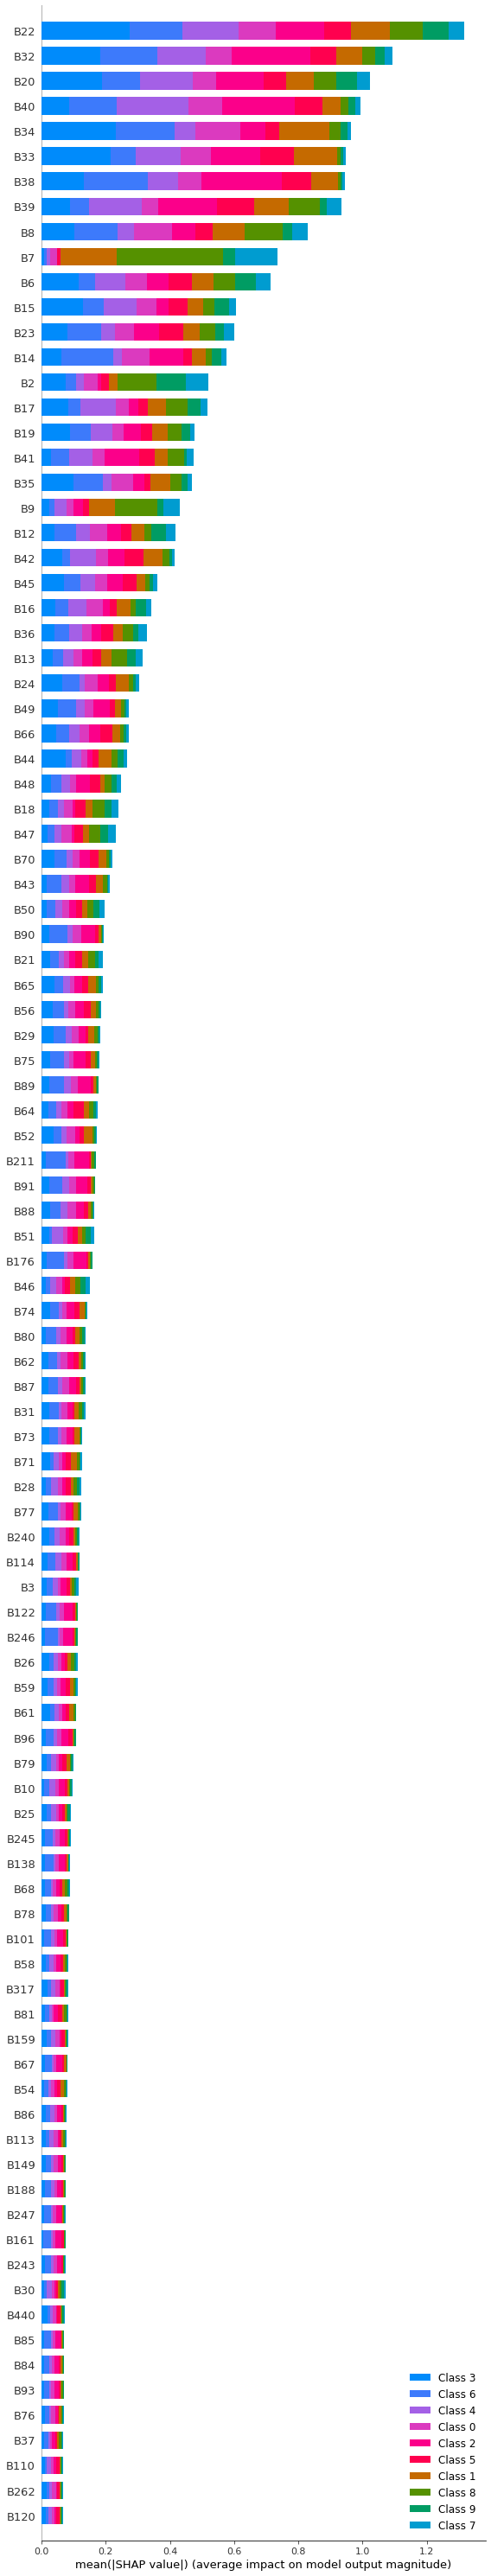

In [26]:
#compute SHAP values
#Random Index
import shap
explainer = shap.DeepExplainer(model, x_train_rand)
shap_values = explainer.shap_values(x_test_rand)
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = columnsName, max_display=100)